<a href="https://colab.research.google.com/github/chris78rey/DIPLOM_BIGDATA/blob/main/Copy_of_Fase_1_Precios_de_Airbnb_en_la_ciudad_de_New_York_Estudiantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cree una copia de este Notebook en su Drive y desarrolle el taller sobre ese documento copia. Para crear la copia debe dar click en el botón **Copiar en Drive** ubicado en el panel superior, se abrirá un nuevo notebook que podrá manipular a su antojo y que se almacenará en su Drive dentro de la Carpeta *Colab Notebooks*.

<img src = "https://github.com/HarryVargas96/UdeCataluna/blob/main/logo_uc_grande.png?raw=true" alt = "Encabezado" width = "100%">  </img>



# **Agrupar los diferente tipos de hospedaje de acuerdo a sus características(Cluster) Predicción del precio de hospedajes en Airbnb para la ciudad de Amsterdam**

**Contexto:** Airbnb es una empresa que ofrece una plataforma de software dedicada a la oferta de alojamientos particulares y turísticos mediante la cual los anfitriones pueden publicitar y contratar el arriendo de sus propiedades con sus huéspedes; anfitriones y huéspedes pueden valorarse mutuamente, como referencia para futuros usuarios. Muchos nuevos anfitriones no cuentan con información global de tendencias del mercado por lo que sus precios no son óptimos. Airbnb gana una comisión por cada arrendamiento, por lo tanto, está interesado en que sus anfitriones cobren una tarifa óptima de acuerdo a las características del hospedaje. Si los anfitriones ganan más… Airbnb también.

**Problema de Negocio:** La empresa Airbnb lo ha contratado para desarrollar un análisis descriptivo y exploratorio que permita responder la siguiente pregunta: ¿Cuál es la variable o característica más relevante para determinar el precio de un hospedaje en Airbnb?

**Sistema de información:** El conjunto de datos objetivo posee información acerca de 30.000 hospedajes de la plataforma Airbnb en la ciudad de Nueva York. Los datos a usar son datos públicos creados por Inside Airbnb, para más información puede consultar [aquí]( http://insideairbnb.com/get-the-data/).


## Indicaciones para resolver el Taller

El objetivo de este taller es que usted pueda desarrollar un análisis exploratorio completo del dataset propuesto. Para ello tendrá que programar, investigar y analizar todos los resultados que vaya obteniendo. Tenga en cuenta las siguientes indicaciones:

* Puede visualizar los resultados esperados en la mayoría de ejercicios, use esto como una guía, no es un requisito.
* Añada comentarios al código para que documente sus soluciones. 
* **Coloque su análisis en una celda de Texto luego de cada resultado.**
* Para resolver un ejercicio puede usar tantas celdas de Código o Texto como requiera.

Si se le presenta un error de código o duda. Siga los siguientes pasos:
1. Lea y entienda el error, para ello puede buscar en la documentación de la librería o googlearlo
2. Intente resolverlo
3. Comuníquese con el expero temático usando el Foro, recuerde enviar un pantallazo del error y mencionar que Ejercicio está solucionando. **Abstengase de compartir el link de su Notebook en el Foro.**



A continuación, se listan algunos recursos que pueden ser valiosos para su análisis.
* En esta página puede encontrar las gráficas que se pueden construir dependiendo de las variables disponibles, una breve explicación de cada gráfica y código para construir cada visualización. https://www.data-to-viz.com/
* Documentación de Pandas. https://pandas.pydata.org/docs/index.html
* Documentación de Seaborn. https://seaborn.pydata.org/index.html
* Documentación de Folium. https://python-visualization.github.io/folium/

## Cargar las librerías necesarias

A continuación vamos a cargar las librerías necesarias para el desarrollo de este caso.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [ ]:
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn',sns.__version__)

Python 3.7.13
NumPy 1.21.6
Pandas 1.3.5
Matplotlib 3.5.2
Seaborn 0.11.2


Este caso de uso fue creado con las siguientes versiones:

```
Python 3.7.13
NumPy 1.21.6
Pandas 1.3.5
Matplotlib 3.2.2
Seaborn 0.11.2
```



## Cargar el dataset de trabajo

In [ ]:
pd.options.display.max_columns = 100 # Permite visualizar todas las columnas del dataframe

airbnb =  pd.read_csv('https://github.com/chris78rey/DIPLOM_BIGDATA/blob/main/listings_amsterdam_sin_limpiar.csv?raw=true')

airbnb.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,23726706,https://www.airbnb.com/rooms/23726706,20220605131734,2022-06-05,Private room 20 minutes from Amsterdam + Break...,Cousy private room 20 min. from Amsterdam. Sh...,We live in a nice Cousy and clean house with e...,https://a0.muscache.com/pictures/eb6d6636-02d6...,122619127,https://www.airbnb.com/users/show/122619127,Patricia,2017-03-26,"Diemen, North Holland, Netherlands","Hi, Welcome. we are so glade we are able to op...",within an hour,100%,95%,f,https://a0.muscache.com/im/pictures/user/52706...,https://a0.muscache.com/im/pictures/user/52706...,NaN,1,1,"['email', 'phone', 'work_email']",t,t,"Diemen, Noord-Holland, Netherlands",IJburg - Zeeburgereiland,NaN,52.34916,4.97879,Private room in home,Private room,2,NaN,1 shared bath,1.0,1.0,"[""Carbon monoxide alarm"", ""Dishes and silverwa...",$88.00,2,14,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,0,6,20,66,2022-06-05,78,11,3,2018-03-26,2022-05-29,4.99,4.96,4.97,4.95,4.97,4.73,4.87,038469D9AA6BDF1142CE,t,1,0,1,0,1.53
1,35815036,https://www.airbnb.com/rooms/35815036,20220605131734,2022-06-05,"Vrijstaand vakantiehuis, privé tuin aan het water",Bij het pittoreske dorpje Watergang ligt ons p...,U heeft hier diverse mogelijkheden. Zo kunt u ...,https://a0.muscache.com/pictures/e309d415-78de...,269425139,https://www.airbnb.com/users/show/269425139,Lydia,2019-06-18,"Watergang, North Holland, Netherlands",NaN,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/af417...,https://a0.muscache.com/im/pictures/user/af417...,NaN,1,1,"['email', 'phone']",t,t,"Watergang, Noord-Holland, Netherlands",Noord-Oost,NaN,52.42419,4.95689,Tiny home,Entire home/apt,2,NaN,1.5 baths,NaN,1.0,"[""Carbon monoxide alarm"", ""Dishes and silverwa...",$105.00,3,100,1.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,4,6,12,243,2022-06-05,95,36,6,2019-06-26,2022-06-02,4.96,4.94,5.00,4.98,4.98,4.81,4.83,NaN,f,1,1,0,0,2.65
2,31553121,https://www.airbnb.com/rooms/31553121,20220605131734,2022-06-05,Quiet Guesthouse near Amsterdam,Welcome to the countryside north of Amsterdam ...,Within 6 kilometers of the city center you'll ...,https://a0.muscache.com/pictures/64edc273-3b2b...,76806621,https://www.airbnb.com/users/show/76806621,Ralf,2016-06-09,"Landsmeer, North Holland, Netherlands",NaN,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/1df22...,https://a0.muscache.com/im/pictures/user/1df22...,NaN,1,1,"['email', 'phone']",t,t,"Landsmeer, Noord-Holland, Netherlands",Noord-West,NaN,52.43237,4.91821,Entire guesthouse,Entire home/apt,4,NaN,1 bath,1.0,3.0,"[""Dishwasher"", ""Carbon monoxide alarm"", ""Ether...",$152.00,2,60,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,0,3,3,3,2022-06-05,82,26,1,2019-02-04,2022-05-2

In [ ]:
airbnb['price'].describe()

count        6173
unique        532
top       $150.00
freq          249
Name: price, dtype: object

In [ ]:
# Dimensiones del dataframe
airbnb.shape

(6173, 74)

In [ ]:
# Resumen de las variables del dataframe
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6173 entries, 0 to 6172
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6173 non-null   int64  
 1   listing_url                                   6173 non-null   object 
 2   scrape_id                                     6173 non-null   int64  
 3   last_scraped                                  6173 non-null   object 
 4   name                                          6173 non-null   object 
 5   description                                   6157 non-null   object 
 6   neighborhood_overview                         4316 non-null   object 
 7   picture_url                                   6173 non-null   object 
 8   host_id                                       6173 non-null   int64  
 9   host_url                                      6173 non-null   o

## Análisis Univariado

### Ejercicio 1

Como puede observar en el resumen anterior, el dataframe airbnb tiene 28 columnas. 
Haga la detección de las variables listadas a continuación, siga la tabla de ejemplo.

* price
* latitud
* longitud
* host_is_superhost
* neighbourhood
* property_type
* room_types
* bathrooms
* bedrooms
* number_of_reviews
* reviews_per_month


[Aquí](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing) encontrará el diccionario de Datos para el conjunto de datos de trabajo.

Nota: Puede encontrar variables que estén representadas por números, sin embargo, su tipología es cualitativa o categórica.

Respuesta:

|Nombre de la variable|Descripción|Tipología estadística|Tipología computacional|
|---|---|---|---|
|price|Precio diario en dólares|Cuantitativa continua|int|
|latitude|Latitud basado en World Geodetic System|Cuantitativa continua|float|
|parking|Si tiene o no tiene parqueadero|Cualitativa dicotómico|int|
|host_is_superhost|Toma el valor de true o false|Cualitativa dicotómico|boolean|
|neighbourhood|Vecindario|Cuantitativa continua|text|
|property_type|Tipo de propiedad autoseleccionable|Cualitativa dicotómico|text|
|room_types|Agrupamiento de las casas|Cualitativa dicotómico|text|
|bathrooms|Numero de baños en la lista|Cuantitativa continua|numerico|
|bedrooms| Numero de dormitorios|Cuantitativa continua|int|
|number_of_reviews|Numero de revisiones|Cuantitativa continua|int|
|reviews_per_month|Numero de revisiones en su vida útil|Cuantitativa continua|numerico|

### Ejercicio 2

Obtenga un resumen estadístico para las variables: price, bedrooms, bathrooms latitude y longitude. Haga un corto análisis de sus hallazgos. ¿Cuál es el rango de cada variable? ¿La distribución de la variable es simétrica? ¿Hay atípicos? ¿Los valores son lógicos en el contexto del negocio?



<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>



* Filtre las 5 variables, obtendrá un dataframe solo con esas columnas.
* Aplique el método `describe()`

In [ ]:
# Respuesta:
airbnb5col=airbnb[['price','bedrooms','bathrooms','latitude','longitude']]
airbnb5col
airbnb5col.describe()
airbnb5col.rank()

airbnb5col


,price,bedrooms,bathrooms,latitude,longitude
0,$88.00,1.0,NaN,52.349160,4.978790
1,$105.00,NaN,NaN,52.424190,4.956890
2,$152.00,1.0,NaN,52.432370,4.918210
3,$87.00,1.0,NaN,52.296200,5.012310
4,$160.00,2.0,NaN,52.314750,5.030300
...,...,...,...,...,...
6168,$142.00,NaN,NaN,52.318428,4.870775
6169,$95.00,1.0,NaN,52.346680,4.963590
6170,$180.00,3.0,NaN,52.426240,4.902360
6171,$174.00,2.0,NaN,52.319830,4.864630


In [ ]:
airbnb5col
airbnb5col['price'] = airbnb5col['price'].str.replace('$','')
airbnb5col['price'] = pd.to_numeric(airbnb5col['price'],errors='coerce')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from 

"\nairbnb5col['price'] = airbnb5col['price'].str.replace('$','')\nairbnb5col['price'] = pd.to_numeric(airbnb5col['price'],errors='coerce')\n"

AxesSubplot(0.125,0.125;0.775x0.755)


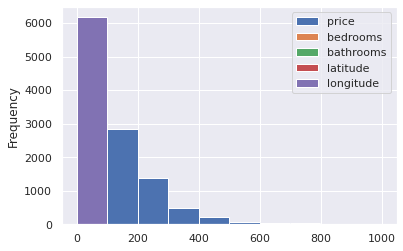

In [ ]:
histogram = airbnb5col.plot.hist()
print(histogram)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


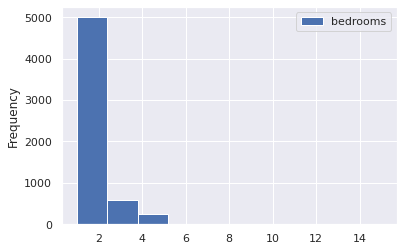

In [ ]:
airbnb5col=airbnb[['bedrooms']]
histogram = airbnb5col.plot.hist(   )
print(histogram)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


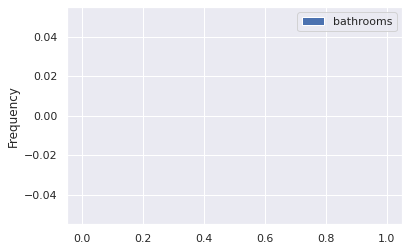

In [ ]:
airbnb5col=airbnb[['bathrooms']]
airbnb5col.head(100)
histogram = airbnb5col.plot.hist()
print(histogram)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


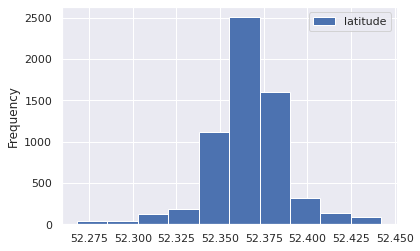

In [ ]:
airbnb5col=airbnb[['latitude']]
airbnb5col.head(100)
histogram = airbnb5col.plot.hist()
print(histogram)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


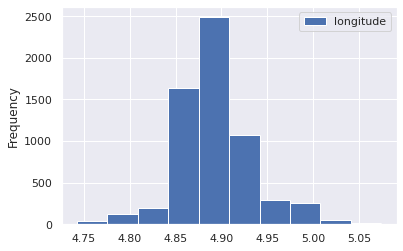

In [ ]:
airbnb5col=airbnb[['longitude']]
airbnb5col.head(100)
histogram = airbnb5col.plot.hist()
print(histogram)
plt.show()

## Visualizaciones
Tenga presente las siguientes recomendaciones para todas las gráficas que realice.

Recuerde que una buena gráfica al menos debe tener:
* **título:** descripción corta de lo que se está mostrando
* **títulos de ejes:** título para la variable en x, título para la variable en y
* **análisis:** lo más valioso de la gráfica es la interpretación y análisis del analista, la gráfica por sí sola no genera valor

AxesSubplot(0.125,0.125;0.775x0.755)


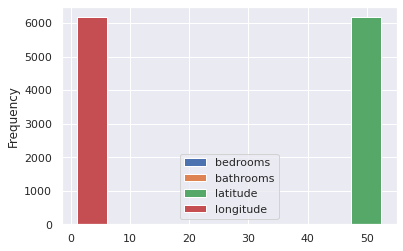

In [ ]:
airbnb5col=airbnb[['price','bedrooms','bathrooms','latitude','longitude']]
histogram = airbnb5col.plot.hist()
print(histogram)
plt.show()

### Ejercicio 3

Revisemos nuestra variable objetivo price. Construya un histograma para conocer su distribución. 

Describa la distribución del precio, su forma, simetría, kurtosis, sesgo, presencia de atípicos. Puede también apoyarse de las estadísticas descriptivas obtenidas en el ejercicio anterior.





<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>



* Use `histplot()` de seaborn. Puede construir también el perfil de densidad kde.
* [Curtosis](https://pandas.pydata.org/docs/reference/api/pandas.Series.kurtosis.html?highlight=kurtosis#pandas.Series.kurtosis)
* [Sesgo](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


AxesSubplot(0.125,0.125;0.775x0.755)


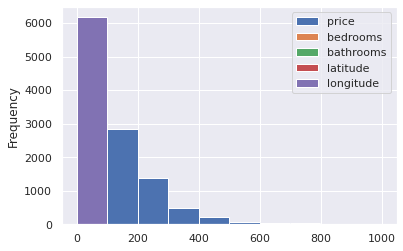

In [ ]:

airbnb5col=airbnb[['price','bedrooms','bathrooms','latitude','longitude']]


airbnb5col
airbnb5col['price'] = airbnb5col['price'].str.replace('$','')
airbnb5col['price'] = pd.to_numeric(airbnb5col['price'],errors='coerce')


histogram = airbnb5col.plot.hist()
print(histogram)
plt.show()

### Ejercicio 4

Acompañe el análisis del punto anterior con la construcción e interpretación de un boxplot para el precio.

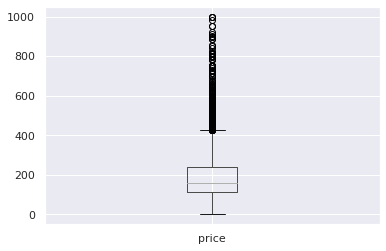

In [ ]:
df = pd.DataFrame(airbnb5col,
                  columns=['price'])
boxplot = df.boxplot(column=['price'])  

### Ejercicio 5

Basado en lo que hemos hecho hasta ahora, analice las variables longitude y latitude. Use los recursos que crea necesarios para analizar de forma univariada estas 2 variables. No olvide discutir los resultados obtenidos.

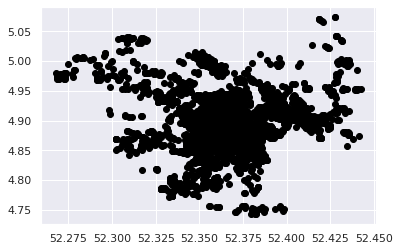

In [ ]:
# Respuesta
x =airbnb5col['latitude'].tolist()
 
y =airbnb5col['longitude'].tolist()
 
plt.scatter(x, y, c ="black")
 
# To show the plot
plt.show()

### Ejercicio 6

Pasemos ahora a analizar las variables cualitativas ¿Cuántos barrios diferentes tiene la variable neighbourhood? 

Haga una gráfica que muestre la cantidad de hospedajes por barrio. Solamente muestre el top 10.





<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>

* Métodos útiles:
`.nunique(), .unique(), .value_counts(),.sort_values(),head()`
* Obtenga la cantidad de valores únicos y una lista con el nombre de los barrios.
* Obtenga la tabla de frecuencia con la cantidad de hospedajes por barrio. 
* Organicela de mayor a menor a frecuencia.
* Grafique usando el método `.plot()`
* No olvide describir y analizar la visualización obtenida. ¿Todos los barrios tienen la misma cantidad de hospedajes? ¿Cuales son los 3 más importantes?
* ¿Qué porcentaje de los hospedajes están el top 3?

In [ ]:
# Respuesta
var1=airbnb['neighbourhood'].unique()
unicas=len(airbnb['neighbourhood'].unique())
print('Obtenga la cantidad de valores únicos y una lista con el nombre de los barrios ',unicas, ' y los barrios son:')
lista=var1.tolist()
for i in lista:
    print(i)



Obtenga la cantidad de valores únicos y una lista con el nombre de los barrios  92  y los barrios son:
Diemen, Noord-Holland, Netherlands
Watergang, Noord-Holland, Netherlands
Landsmeer, Noord-Holland, Netherlands
Abcoude, Utrecht, Netherlands
Weesp, Noord-Holland, Netherlands
Ouderkerk aan de Amstel, Noord-Holland, Netherlands
nan
Zuiderwoude, Noord-Holland, Netherlands
Amsterdam, ., Netherlands
Amsterdam, Noord-Holland, Netherlands
Amstelveen, Noord-Holland, Netherlands
Amsterdam, North Holland, Netherlands
Amsterdam, NH, Netherlands
Amsterdam, Netherlands, Netherlands
De Pijp, North Holland, Netherlands
Watergraafsmeer, North Holland, Netherlands
Jordaan, North Holland, Netherlands
Zeeburg, North Holland, Netherlands
Amsterdam, Haarlemmerbuurt, Netherlands
Amsterdam, Netherlands
Amsterdam-Zuidoost, North Holland, Netherlands
Amsterdam, SN, Netherlands
Amsterdam, Noord Holland, Netherlands
Amsterdam, Holland, Netherlands
Amsterdam Zuidoost, North Holland, Netherlands
Amsterdam Zuid-O

Obtenga la tabla de frecuencia con la cantidad de hospedajes por barrio.


In [ ]:
n_by_state = airbnb.groupby("neighbourhood")["id"].count()
df_cuenta_hospedajes=n_by_state.to_frame()
df_cuenta_hospedajes
df=df_cuenta_hospedajes.sort_values('id',ascending=False)
df_top10= df.head(10)
df_top10


,id
neighbourhood,
"Amsterdam, Noord-Holland, Netherlands",3148
"Amsterdam, North Holland, Netherlands",533
"Amsterdam, NH, Netherlands",179
"Amsterdam, Netherlands",48
"Abcoude, Utrecht, Netherlands",37
"Amstelveen, Noord-Holland, Netherlands",30
"Badhoevedorp, Noord-Holland, Netherlands",27
"Diemen, Noord-Holland, Netherlands",25
"Landsmeer, Noord-Holland, Netherlands",22


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


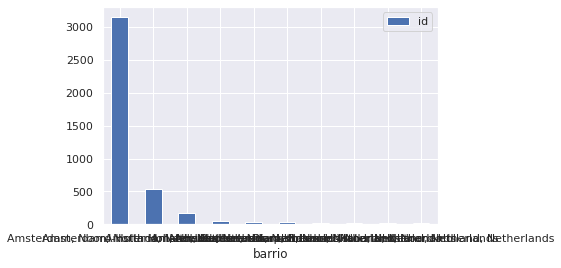

In [ ]:
df_top10['barrio'] = df_top10.index
df_top10.reset_index()
df_top10

df_top10.dtypes

ax = df_top10.plot.bar(x='barrio', y='id', rot=0)

No olvide describir y analizar la visualización obtenida. ¿Todos los barrios tienen la misma cantidad de hospedajes?

No todos los barrios tienen la misma cantidad de hospedajes.
 
 
 ¿Cuales son los 3 más importantes?





Los tres mas importantes son:
Amsterdam, Noord-Holland, Netherlands	3148
Amsterdam, North Holland, Netherlands	533
Amsterdam, NH, Netherlands	179

### Ejercicio 7

Superhost (cuya traducción del inglés significa “Super anfitrión”) es una categoría de Airbnb que destaca a los anfitriones más experimentados, hospitalarios y mejor valorados. Estos anfitriones reciben un distintivo especial en su anuncio y su perfil que les otorga una mayor visibilidad en la plataforma.

¿Qué porcentaje de los hospedajes son ofrecidos por un superhost?

<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>

* value_counts()
* Normalice el conteo y multiplique por 100
* Haga una gráfica

In [ ]:
# Respuesta


### Ejercicio 8

Basado en los ejercicios anteriores analice las variable property_type y parking con los recursos que considere necesarios. No olvide analizar y describir sus resultados.

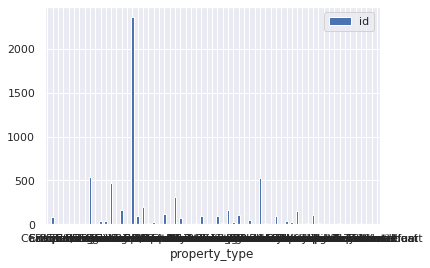

In [ ]:
# Respuesta
n_by_state = airbnb.groupby("property_type")["id"].count()
df_cuenta_hospedajes=n_by_state.to_frame()

df_cuenta_hospedajes['property_type'] = df_cuenta_hospedajes.index


ax = df_cuenta_hospedajes.plot.bar(x='property_type', y='id', rot=0)



## Análisis multivariado

Hasta aquí hemos estado analizando nuestras variables y describiendo las características principales de nuestra población. Ahora vamos a comenzar a buscar relaciones entre nuestras variables, sobretodo con respecto al precio, recuerde que esta es nuestra variable objetivo.


### Ejercicio 9

Construya una gráfica que muestre el mínimo, máximo, media y mediana del precio para las hospedajes con Superhost y sin Superhost.

¿Existe alguna relación entre el precio y ser un *Superhost*? Justifique su respuesta.

Recuerde describir y discutir sus resultados. 


<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>

* agrupe los datos usando `.groupby()` 
* Use el método `.agg()` para calcular las descriptivas de la variable precio
* Grafique con el método `.plot`  
* Puede construir también un boxplot.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


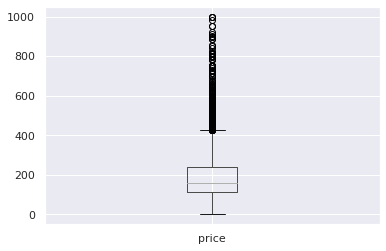

In [ ]:
# Respuesta

df_superhost=airbnb[['price','host_is_superhost']]


df_superhost['price'] = df_superhost['price'].str.replace('$','')
df_superhost['price'] = pd.to_numeric(df_superhost['price'],errors='coerce')



grouped_df = df_superhost.groupby('host_is_superhost')
#print("El valor mínimo es:",grouped_df.min())#
#print("El valor maximo es:", grouped_df.max())
#grouped_df.min()
#grouped_df.max()
grouped_df.mean()
#df_superhost
boxplot = df_superhost.boxplot(column=['price'])  

### Ejercicio 10

Para complementar el punto anterior, construya un boxplot para evaluar la siguiente pregunta. 

¿Existe alguna relación entre el precio y ser un *Superhost*? Justifique su respuesta.

In [ ]:
# Respuesta
airbnb =  pd.read_csv('https://github.com/chris78rey/DIPLOM_BIGDATA/blob/main/listings_amsterdam_sin_limpiar.csv?raw=true')

df_superhost=airbnb[['price','host_is_superhost']]
df_superhost.dtypes

df_superhost['price'] = df_superhost['price'].str.replace('$','')
df_superhost['price'] = pd.to_numeric(df_superhost['price'],errors='coerce')



df_superhost['host_is_superhost'] = df_superhost['host_is_superhost'].str.replace('t','1')
df_superhost['host_is_superhost'] = df_superhost['host_is_superhost'].str.replace('f','0')
df_superhost['host_is_superhost'] = pd.to_numeric(df_superhost['host_is_superhost'],errors='coerce')


print(df_superhost.corr())




                      price  host_is_superhost
price              1.000000          -0.061668
host_is_superhost -0.061668           1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/

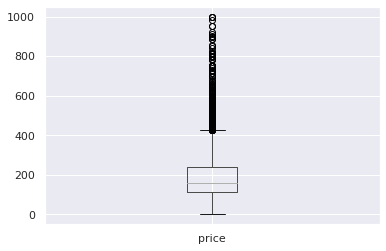

In [ ]:

boxplot = df_superhost.boxplot(column=['price'])  

## Ejemplo 1: Análisis del precio en función del tipo de propiedad

Analicemos ahora la relación entre el tipo de propiedad y el precio usando un boxplot.


In [ ]:
# Para darle orden a la gráfica vamos a organizar los tipos de propiedades de menor mayor mediana

median_order = (airbnb.groupby('property_type') # agrupar por tipo de propiedad
['price'].                                      # filtrar el precio en cada grupo
median().                                       # calcular la mediana
sort_values().                 # organizar 
index)

median_order

TypeError: ignored

In [ ]:
fig = plt.figure(figsize = (10,10) ) # se crea la figura y se determina el tamaño

sns.boxplot(data = airbnb, 
            y = 'property_type', 
            x = 'price',
            order = median_order ) # ordenamiento de mayor a menor frecuencia

plt.xlabel('Precio en dólares')
plt.ylabel('Tipo de propiedad')
plt.title('Precio del hospedaje en función del tipo de propiedad')

Debido a la cantidad tan grande de tipos de propiedad, la gráfica anterior carece de valor y es demasiado compleja. Vamos a crear un subconjunto de datos solamente con los 5 tipos de propiedades que tienen mayor frecuencia. En el proceso no perderemos demasiados datos, ya que, el 96% de los hospedajes pertenecen a estas 5 categorías.


In [ ]:
# Primero, encontramos cuales son los 5 tipos de propiedades más comunes

airbnb['property_type'].value_counts(normalize = True).head(5)*100

In [ ]:
# Extraemos el índice que contiene el nombre de las categorías de interés

top5_properties = (airbnb['property_type'].value_counts(normalize = True).head(5)*100).index
top5_properties

`.isin()` nos permite encontrar todas las coincidencias existentes sobre una lista u objeto iterable. En este caso nos permite encontrar todos los hospedajes que pertenezcan a nuestro top 5 de tipos de propiedades. Para más información sobre este método consulte [aquí](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html).



In [ ]:
# Creamos un filtro con el método isin()

top = airbnb.loc[airbnb['property_type'].isin (top5_properties)]
top.head()

In [ ]:
# Creamos una lista con las 5 propiedades ordenadas de mayor a menor mediana

median_order_top = (top.groupby('property_type')
['price']
.median()
.sort_values(ascending= False)
.index)

median_order_top

In [ ]:
# Finalmente construimos la gráfica solicitada con el nuevo subconjunto top

sns.boxplot(data = top, 
            y = 'property_type', 
            x = 'price',
            order = median_order_top) # las organizamos de acuerdo al top 5 obtenido anteriormente

plt.xlabel('Precio en dólares')
plt.ylabel('Tipo de propiedad')
plt.title('Precio del hospedaje en función del tipo de propiedad')

En la anterior visualización podemos observar una alta dispersión para  todas las categorías. Todas las distribuciones son asimétricas hacía la derecha, la asimetría es ocasionada por propiedades con precios mayores a la media en cada caso. Comparando las medianas podemos observar que en general los condominios son los tipos de propiedad más costosos seguido por los lofts y los apartamentos. 

**Conclusión: Se observa una distribución de precios ligeramente diferente para cada tipo de propiedad. Los precios sí se ven afectados por el tipo de propiedad, sin embargo, solamente esta variable no permite explicar el comportamiento del precio.**

Nota: Observe que en la gráfica general hay tipos de propiedades con mayor precio promedio que los condominios y menor precio que las casas, discuta al respecto.

### Ejercicio 11  (Díficil)

Repita el análisis que acabamos de hacer en el ejemplo anterior con el tipo de propiedad y su relación con el precio, pero ahora responda: **¿Existe una relación entre el barrio y el precio por noche del Airbnb?**

In [ ]:
# Respuesta

### Ejercicio 12

Construya un boxplot entre la variable parqueadero y precio.

¿Existe alguna relación entre si un Airbnb tiene parqueadero y su precio?

In [ ]:
# Respuesta



### Ejercicio 13

Construya una gráfica de dispersión de longitud y latitud. Longitud debe ir en el eje horizontal y latitud en el eje vertical. Para más información consulte [aquí](https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Latitud_y_Longitud_en_la_Tierra.svg/1920px-Latitud_y_Longitud_en_la_Tierra.svg.png).


¿Encuentra algunos patrones? ¿Los hospedajes se distribuyen de forma homogénea en la ciudad de Nueva York?

In [ ]:
# Respuesta


## Ejemplo 2: Uso de jointplot para evaluar puntos con alta concentración de hospedajes

En la visualización anterior pudimos observar algunos patrones de distribución de los hospedajes, sin embargo, por la gran cantidad de puntos no es posible analizar qué zonas tienen mayor cantidad de hospedajes. Vamos a ver un nuevo tipo de visualización que nos ayudará en ese análisis. La visualización jointplot nos va permitir visualizar al tiempo la distribución de cada variable por separado y adicionalmente veremos dónde hay mayor concentración de puntos usando un mapa de calor.

Para más información de este tipo de visualización consulte [aquí](https://seaborn.pydata.org/generated/seaborn.jointplot.html).

In [ ]:
sns.jointplot(data = airbnb,
              x='longitude', 
              y='latitude', 
              kind="hex", # define la forma de las zonas que vamos a construir
              color = 'red')

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Hospedajes en función de la ubicación')
plt.tight_layout() # Evita el sobrelapamiento de elementos

Podemos obsevar una clara concentración de hospedajes en la zona de Manhattan y Brooklyn al sur del Central Park. Alrededor de del Central Park también se puede ver una alta cantidad de hospedajes. Esto se debe principalmente a que es una zona central, turística y prestigiosa de la ciudad.  Más adelante construiremos esta misma gráfica pero sobre el mapa de la ciudad de Nueva York.

<img src = "https://origin-www.nycgo.com/images/pages/71068/neighbs_socialshare_1200x628_fiveboros__facebook.png" alt = "Encabezado" width = "50%">  </img>

### Ejercicio 14

Utilice un jointplot para analizar la relación entre el número de reseñas (reviews) y el precio.
¿Existe una relación entre el precio y el número de reseñas?

In [ ]:
# Respuesta

### Ejercicio 15

¿Existe alguna relación entre los Superhosts y el número de reseñas?

Puede emplear un diagrama de barras o un boxplot para responder esta pregunta. No olvide discutir el resultado.

In [ ]:
# Respuesta



## Ejemplo 3: Creación de un geoheatmap con Folium

Vamos a trabajar con una herramientas de visualización de mapas interactivos. La librería se se llama folium. Instalamos la librería usando el gestor de paquetes pip. También importamos los módulos necesarios para crear nuestra visualización. Para más información de la librería folium consulte la [Documentación](https://python-visualization.github.io/folium/).

In [ ]:
!pip install -U folium

In [ ]:
import folium 
from folium.plugins import HeatMap

In [ ]:
map = folium.Map()
map

Podemos ubicar el mapa donde queramos, solo necesitamos las coordenadas del lugar. Por ejemplo, situemos nuestro mapa en la Plaza de Bolívar en Bogotá. Las coordenadas fueron obtenidas usando Google Maps. 
La estructura de las coordenadas es la siguiente:
```
[Latitud, Longitud]
```



In [ ]:
plaza_bolivar = [4.598464,-74.076184] # Coordenas de la plaza de Bolívar

map = folium.Map(location = plaza_bolivar,
                 zoom_start= 20, # Zoom inicial, valor más grande, mayo zoom
                 tiles="OpenStreetMap")
map

Luego de esa prueba interesante, ahora sí, construyamos el mapa de Nueva York con las coordenadas respectivas, vamos a centrar el mapa en Central Park.

In [ ]:
nueva_york = [40.781027,-73.965726]
map1 = folium.Map(location = nueva_york, zoom_start= 10,tiles="OpenStreetMap")
map1

Ahora necesitamos entregarle a Folium un contenedor de los datos de latitud y longitud. Para eso usamos la función zip que convierte dos objetos iterables y une los elementos en tuplas. Para más información consulte [aquí](https://ellibrodepython.com/zip-python).

In [ ]:
data = list(zip(airbnb['latitude'], 
                airbnb['longitude']))

data[0:10]

Ahora vamos a crear la capa del mapa de calor usando un plugin de Folium llamada HeatMap. A este le pasamos los datos y algunos parámetros para ajustar el color. Es importante que la librería Folium esté actualizada para que el mapa sea reproducible. 

In [ ]:
hm_loc = HeatMap(data,
              min_opacity = 0.2,
              radius = 8,
              blur = 6)

In [ ]:
# Ahora añadimos la capa al mapa que ya habíamos creado

map1.add_child(hm_loc)
map1

El mapa de calor anterior nos está mostrando en que zonas de la ciudad hay una mayor densidad de hospedajes.

In [ ]:
# Podemos guardar el mapa como un archivo html interactivo

map1.save("heat_map_density.html")

### Ejercicio 16

Discuta y analice lo que observa en el mapa de calor que acabamos de crear.

Respuesta

## Ejemplo 3: Creación de un geoheatmap con Folium

Ahora vamos a crear un mapa de calor que nos muestre en que zonas de la ciudad están los hospedajes más costosos.

In [ ]:
nueva_york = [40.781027,-73.965726]
map2 = folium.Map(location = nueva_york, zoom_start= 10,tiles="OpenStreetMap")
data2 = list(zip(airbnb['latitude'], 
                airbnb['longitude'],
                airbnb['price'])) # Note que pasamos una tercera columna que es el precio

data2[0:10]

In [ ]:
hm_price = HeatMap(data2,
              min_opacity = 0.2,
              radius = 8,
              blur = 6)

map2.add_child(hm_price)
map2

In [ ]:
map2.save("heat_map_density.html")

### Ejercicio 17

Haga un análisis del mapa que acabamos de crear.

### Ejercicio 18

Escriba sus conclusiones del análisis de datos realizado. Recuerde que las conclusiones deben ser números, estadísticos, información que sale del análisis, no es un resumen de lo aprendido, ni una observación personal acerca del trabajo realizado, ¿qué comportamiento muestran los datos? ¿cuales fueron las respuestas a las preguntas de negocio? ¿cuales considera hasta ahora las variables más importantes respecto a su relación con el precio?
¿Encontró errores en los datos, atípicos? **Las conclusiones son parte fundamental de un informe y/o trabajo investigativo.**

Respuesta

**Aquí termina esta primera fase de exploración, en la siguiente trabajaremos en algo de limpieza, creación de nuevas variables y complementar nuestro análisis exploratorio preliminar. Siéntase libre de añadir abajo de esta celda cualquier otra pregunta de negocio, código relacionado u observaciones relevantes.**

## **Créditos**
---

**Profesor:** Harry Vargas Rodríguez

**Corporación Universitaria de Cataluña** - *Diplomado en Big Data y Data Science*